In [79]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [82]:
#Loading the Ebay data
dataset = read_csv("..\\Urmisha\\Desktop\\Ebay_Sales.csv")
dataset.head(10)

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,snippit,description
0,1,0,199.00,NaN,Pre-owned,9.5,Low,Open Toe,Black,Suede,Had soles re- covered.,Very good condition. Heel height very manageab...
1,0,0,375.00,NaN,New with box,7.5,High,Slingback,Other/Missing,Satin,NaN,"From my own personal collection, great conditi..."
2,1,1,299.99,780.00,Pre-owned,8.5,High,Pump,Black,Other/Missing,NaN,With its staggering half-foot-high heel and ch...
3,1,1,49.99,561.00,Pre-owned,8.5,High,Pump,Black,Snakeskin,NaN,"Comes w/ box, dustbag, and extra heel in its o..."
4,0,0,89.00,NaN,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,NaN,Please ask questions before bidding. \n \nThis...
5,1,1,50.00,202.50,New with box,8.5,High,Platform,Black,Patent Leather,NaN,NIB Christian Louboutin Miss Boxe 100 patent w...
6,1,1,250.00,300.01,Pre-owned,10.0,NaN,Other/Missing,Black,Other/Missing,NaN,Fabulous Sexy Lace Louboutin Booties. Retailed...
7,1,0,597.00,NaN,Pre-owned,6.5,NaN,Pump,Other/Missing,Other/Missing,NaN,Selling Christian Louboutin So Kate with shipp...
8,0,1,450.00,450.00,Pre-owned,9.0,High,Pump,Black,Patent Leather,NaN,AUTHENTIC CHRISTIAN LOUBOUTIN \n \n SHOES. ...
9,1,1,9.99,153.50,Pre-owned,6.5,High,Slingback,Black,Other/Missing,NaN,Brand: Christian\nLouboutin \n\n \n\n Mod...


In [83]:
# randomly selected 10 rows/observations
dataset.sample(10)

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,snippit,description
2231,1,0,899.99,NaN,Pre-owned,9.5,High,Other/Missing,Black,Suede,AS SEEN ON CELEBRITIES!!! Sold out everywhere....,"*All sales are final, there is absolutely NO R..."
613,1,0,229.00,NaN,Pre-owned,8.0,High,Stiletto,Other/Missing,Other/Missing,NaN,"Christian Louboutin charcoal velvet stilettos,..."
2955,0,1,899.99,899.99,New with box,8.5,High,Pump,Beige,Patent Leather,NaN,"MY DEAR CUSTOMERS, I'M HERE TO INFORM YOU, TH..."
959,1,0,495.00,NaN,Pre-owned,6.0,NaN,Pump,Other/Missing,Other/Missing,NaN,Christian Louboutin Filo Kid Nude 120 size 36....
2844,0,0,425.00,NaN,New without box,7.5,High,Slingback,Other/Missing,Other/Missing,NaN,New but without box. Authenticity guaranteed. ...
860,1,0,179.99,NaN,Pre-owned,6.0,High,Platform,Black,Patent Leather,NaN,Christian Louboutin Slingback Black Patent Lea...
648,1,0,85.00,NaN,Pre-owned,10.0,Low,Slingback,Other/Missing,Leather,NaN,These are a pair of beautiful used Christian L...
2888,1,0,0.00,NaN,New without box,NaN,High,Pump,Other/Missing,Leather,NaN,*** ALL MY ITEMS ARE 100%\nAUTHENTIC (PLEASE S...
1056,1,0,399.99,NaN,Pre-owned,8.5,NaN,Slingback,Other/Missing,Leather,NaN,Gorgeous Christian Louboutin shoes in white le...
89,1,1,0.99,310.00,Pre-owned,7.0,NaN,Platform,Other/Missing,Other/Missing,Pre-owned in good condition,Be the envy of your friends with these beautie...


In [84]:
#Data Summary
print("Column List\n", dataset.columns)
print("DataTypes\n ",dataset.dtypes)
print("\nShape of Dataset: ",dataset.shape)
print("\nSize of dataset: ",dataset.size)
print("\nDataset Info\n",dataset.info())

Column List
 Index(['biddable', 'sold', 'startprice', 'saleprice', 'condition', 'size',
       'heel', 'style', 'color', 'material', 'snippit', 'description'],
      dtype='object')
DataTypes
  biddable         int64
sold             int64
startprice     float64
saleprice      float64
condition       object
size           float64
heel            object
style           object
color           object
material        object
snippit         object
description     object
dtype: object

Shape of Dataset:  (3796, 12)

Size of dataset:  45552
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 12 columns):
biddable       3796 non-null int64
sold           3796 non-null int64
startprice     3796 non-null float64
saleprice      799 non-null float64
condition      3796 non-null object
size           3728 non-null float64
heel           2835 non-null object
style          3796 non-null object
color          3796 non-null object
material       3796 non-null 

In [85]:
#Descriptive Statistics
#checking the counts
print("Total Records:\n",dataset.count())
#statistical summary 
print("Data Description",dataset.describe())  

Total Records:
 biddable       3796
sold           3796
startprice     3796
saleprice       799
condition      3796
size           3728
heel           2835
style          3796
color          3796
material       3796
snippit         761
description    3711
dtype: int64
Data Description           biddable         sold   startprice    saleprice         size
count  3796.000000  3796.000000  3796.000000   799.000000  3728.000000
mean      0.591149     0.210485   472.273538   372.735883     7.932940
std       0.491687     0.407707   314.227908   264.793373     1.538587
min       0.000000     0.000000     0.000000     0.000000     4.000000
25%       0.000000     0.000000   279.990000   199.990000     7.000000
50%       1.000000     0.000000   449.000000   325.000000     8.000000
75%       1.000000     0.000000   600.000000   499.990000     9.000000
max       1.000000     1.000000  4500.000000  3995.000000    12.000000


In [86]:
# checking missing values for each column
dataset.isnull().sum()

biddable          0
sold              0
startprice        0
saleprice      2997
condition         0
size             68
heel            961
style             0
color             0
material          0
snippit        3035
description      85
dtype: int64

In [87]:
#Drop columns ['snippit','description']
dataset.drop(columns=['snippit','description'],inplace=True)

In [88]:
dataset.columns

Index(['biddable', 'sold', 'startprice', 'saleprice', 'condition', 'size',
       'heel', 'style', 'color', 'material'],
      dtype='object')

In [89]:
# Checking duplicate records
dataset.duplicated().sum()

122

In [90]:
# Showing duplicate records
dataset[dataset.duplicated()]

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material
91,1,0,299.99,NaN,Pre-owned,7.5,High,Pump,Red,Patent Leather
185,1,1,249.99,249.99,Pre-owned,7.0,High,Other/Missing,Other/Missing,Other/Missing
186,0,0,525.00,NaN,Pre-owned,7.5,High,Pump,Beige,Patent Leather
187,1,1,200.00,200.00,Pre-owned,10.0,High,Pump,Red,Patent Leather
188,1,0,300.00,NaN,Pre-owned,10.0,NaN,Open Toe,Other/Missing,Other/Missing
...,...,...,...,...,...,...,...,...,...,...
3711,0,0,26.61,NaN,Pre-owned,5.5,High,Other/Missing,Other/Missing,Other/Missing
3731,0,1,78.50,78.50,New without box,NaN,NaN,Other/Missing,Other/Missing,Other/Missing
3741,0,1,599.00,599.00,New with box,8.5,High,Other/Missing,Black,Patent Leather
3745,0,0,430.00,NaN,Pre-owned,6.0,NaN,Pump,Other/Missing,Other/Missing


In [91]:
dataset.dtypes

biddable        int64
sold            int64
startprice    float64
saleprice     float64
condition      object
size          float64
heel           object
style          object
color          object
material       object
dtype: object

##Data Visualization

[0 1]
0    2997
1     799
Name: sold, dtype: int64


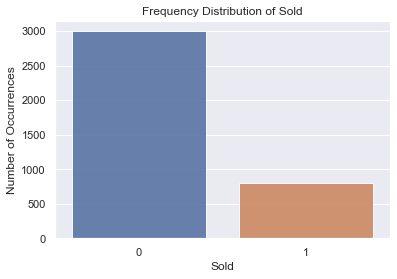

In [92]:
#Proportion of "Sold"
print(dataset['sold'].unique())
print(dataset['sold'].value_counts())


count = dataset['sold'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Sold')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sold', fontsize=12)
plt.show()

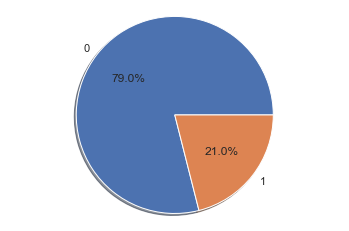

In [93]:
labels = dataset['sold'].astype('category').cat.categories.tolist()
counts = dataset['sold'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

**Note: This defines the majority products are not sold. 
    Only 21% products are sold.

['Black' 'Other/Missing' 'Beige' 'Red' 'Brown']
Other/Missing    1689
Black            1330
Beige             411
Red               192
Brown             174
Name: color, dtype: int64


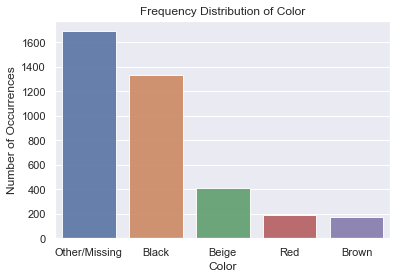

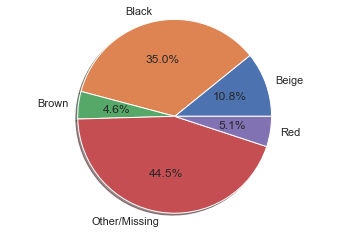

In [94]:
#Proportion of "Color"
print(dataset['color'].unique())
print(dataset['color'].value_counts())


count = dataset['color'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Color')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Color', fontsize=12)
plt.show()


labels = dataset['color'].astype('category').cat.categories.tolist()
counts = dataset['color'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

**Note: Apart from other/missing colors, Black is the most popular and widely in demand.

['Open Toe' 'Slingback' 'Pump' 'Other/Missing' 'Platform' 'Stiletto']
Pump             1719
Platform          622
Other/Missing     486
Open Toe          398
Slingback         342
Stiletto          229
Name: style, dtype: int64


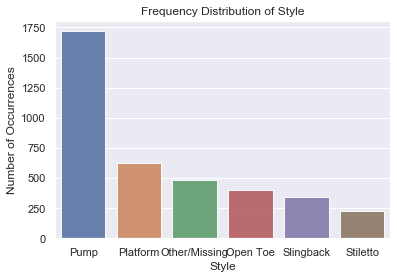

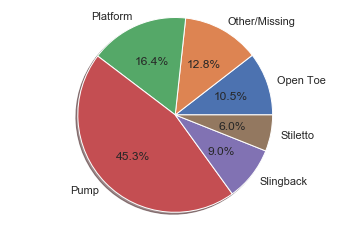

In [95]:
#Proportion of "style"
print(dataset['style'].unique())
print(dataset['style'].value_counts())


count = dataset['style'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Style')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Style', fontsize=12)
plt.show()


labels = dataset['style'].astype('category').cat.categories.tolist()
counts = dataset['style'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

['Suede' 'Satin' 'Other/Missing' 'Snakeskin' 'Leather' 'Patent Leather']
Other/Missing     1172
Leather            975
Patent Leather     928
Suede              450
Satin              158
Snakeskin          113
Name: material, dtype: int64


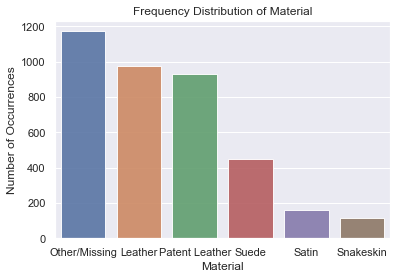

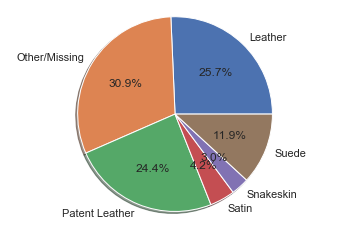

In [96]:
#Proportion of "Material"
print(dataset['material'].unique())
print(dataset['material'].value_counts())


count = dataset['material'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Material')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Material', fontsize=12)
plt.show()


labels = dataset['material'].astype('category').cat.categories.tolist()
counts = dataset['material'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

['Pre-owned' 'New with box' 'New without box' 'New with defects']
Pre-owned           2367
New with box        1092
New without box      257
New with defects      80
Name: condition, dtype: int64


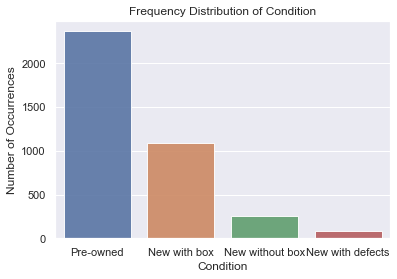

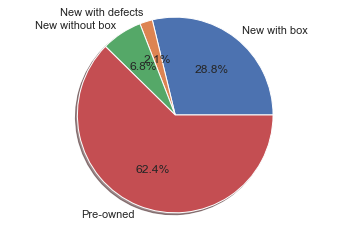

In [97]:
#Proportion of "Condition"
print(dataset['condition'].unique())
print(dataset['condition'].value_counts())


count = dataset['condition'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Condition')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.show()


labels = dataset['condition'].astype('category').cat.categories.tolist()
counts = dataset['condition'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

[1 0]
1    2244
0    1552
Name: biddable, dtype: int64


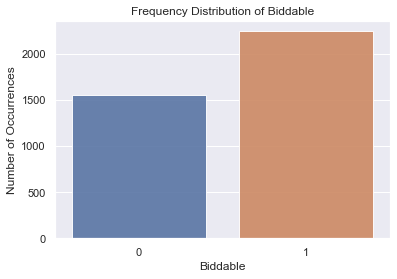

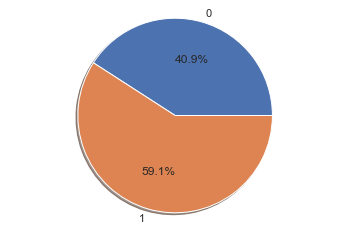

In [98]:
#Proportion of "Biddable"
print(dataset['biddable'].unique())
print(dataset['biddable'].value_counts())


count = dataset['biddable'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Biddable')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Biddable', fontsize=12)
plt.show()


labels = dataset['biddable'].astype('category').cat.categories.tolist()
counts = dataset['biddable'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

##Handling missing values

In [99]:
#Proportion of "heels"
print(dataset['heel'].unique())
print(dataset['heel'].value_counts())

['Low' 'High' 'Flat' nan 'Medium']
High      2610
Medium     163
Low         38
Flat        24
Name: heel, dtype: int64


In [100]:
dataset['heel'].fillna(dataset['heel'].value_counts().index[0], inplace=True)
dataset['heel'].isnull().sum()

0

['Low' 'High' 'Flat' 'Medium']
High      3571
Medium     163
Low         38
Flat        24
Name: heel, dtype: int64


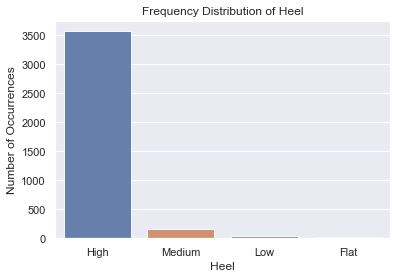

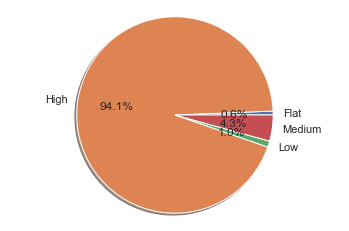

In [101]:
#Proportion of "heel"
print(dataset['heel'].unique())
print(dataset['heel'].value_counts())


count = dataset['heel'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Heel')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heel', fontsize=12)
plt.show()


labels = dataset['heel'].astype('category').cat.categories.tolist()
counts = dataset['heel'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [102]:
#Proportion of "size"
print(dataset['size'].unique())
print(dataset['size'].value_counts())

[ 9.5  7.5  8.5  5.5 10.   6.5  9.   8.   6.   7.  10.5 12.   4.  11.5
 11.   4.5  5.   nan]
8.0     442
7.5     413
7.0     402
9.0     397
8.5     385
6.5     356
9.5     298
6.0     264
10.0    235
5.5     154
10.5    139
5.0      87
11.0     79
4.5      28
11.5     21
12.0     14
4.0      14
Name: size, dtype: int64


In [103]:
dataset['size'].fillna(dataset['size'].value_counts().index[0], inplace=True)
dataset['size'].isnull().sum()

0

[ 9.5  7.5  8.5  5.5 10.   6.5  9.   8.   6.   7.  10.5 12.   4.  11.5
 11.   4.5  5. ]
8.0     510
7.5     413
7.0     402
9.0     397
8.5     385
6.5     356
9.5     298
6.0     264
10.0    235
5.5     154
10.5    139
5.0      87
11.0     79
4.5      28
11.5     21
12.0     14
4.0      14
Name: size, dtype: int64


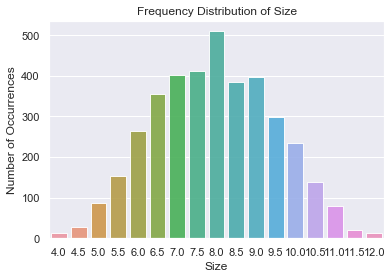

In [104]:
#Proportion of "size"
print(dataset['size'].unique())
print(dataset['size'].value_counts())


count = dataset['size'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Size')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Size', fontsize=12)
plt.show()

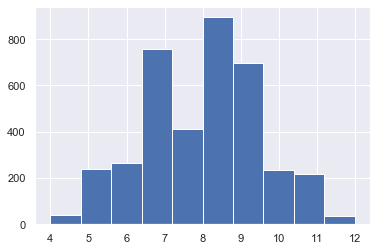

In [106]:
dataset['size'].hist()

In [107]:
dataset.isnull().sum()

biddable         0
sold             0
startprice       0
saleprice     2997
condition        0
size             0
heel             0
style            0
color            0
material         0
dtype: int64

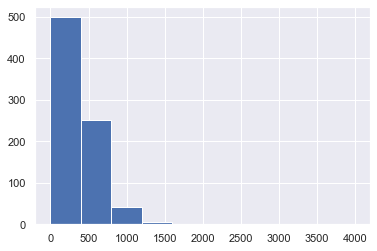

In [108]:
dataset['saleprice'].hist()

In [109]:
dataset['saleprice'].fillna(dataset['saleprice'].mean(), inplace=True)
dataset['saleprice'].isnull().sum()

0

In [110]:
dataset['startprice'].fillna(dataset['startprice'].mean(), inplace=True)
dataset['startprice'].isnull().sum()

0

In [111]:
##Checking for Skewness & Kurtosis in "saleprice" column
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import median 

print("mean : ", np.mean(dataset['saleprice']))
print("var  : ", np.var(dataset['saleprice']))
print("Std.dev  : ", np.std(dataset['saleprice']))
print("median : ",median(dataset['saleprice']))
print("skew : ",skew(dataset['saleprice']))
print("kurt : ",kurtosis(dataset['saleprice']))

mean :  372.7358826032598
var  :  14739.77694312284
Std.dev  :  121.40748306065339
median :  372.73588260325363
skew :  8.723848529577655
kurt :  222.26746443951149


C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


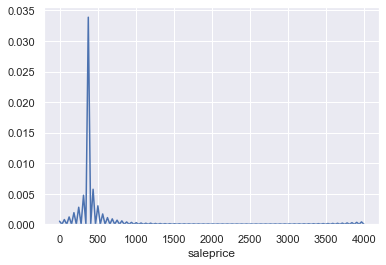

In [112]:
sns.distplot(dataset['saleprice'],kde=True, bins=1)

**Right Skewed...

In [113]:
dataset.isnull().sum()

biddable      0
sold          0
startprice    0
saleprice     0
condition     0
size          0
heel          0
style         0
color         0
material      0
dtype: int64

**Dataset is free from missing values.

##Handling Outliers

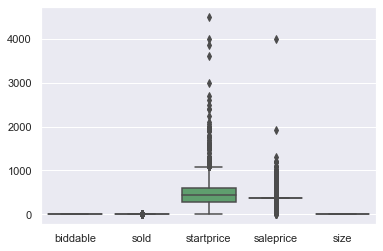

In [114]:
sns.boxplot(data=dataset)

**There are outliers in the dataset.

In [115]:
dataset.columns

Index(['biddable', 'sold', 'startprice', 'saleprice', 'condition', 'size',
       'heel', 'style', 'color', 'material'],
      dtype='object')

In [116]:
##Checking for the outliers
#Removing the outliers
ll = dataset['startprice'].mean() - 3*dataset['startprice'].std()
print("Lower Bound:", ll)
ul = dataset['startprice'].mean() + 3*dataset['startprice'].std()
print("Upper Bound:", ul)

#Detecting Outliers
_Outliers = dataset[(dataset['startprice']>ul) | (dataset['startprice']<ll)]
print(len(_Outliers))

# Creating new Dataframe by removing Outliers
dataset.iloc[:,2] = dataset[(dataset['startprice']>ll) & (dataset['startprice']<ul)]

Lower Bound: -470.41018486213386
Upper Bound: 1414.9572603099696
51


In [117]:
##Checking for the outliers
#Removing the outliers
ll = dataset['saleprice'].mean() - 3*dataset['saleprice'].std()
print("Lower Bound:", ll)
ul = dataset['saleprice'].mean() + 3*dataset['saleprice'].std()
print("Upper Bound:", ul)

#Detecting Outliers
_Outliers = dataset[(dataset['saleprice']>ul) | (dataset['saleprice']<ll)]
print(len(_Outliers))

# Creating new Dataframe by removing Outliers
dataset.iloc[:,3] = dataset[(dataset['saleprice']>ll) & (dataset['saleprice']<ul)]

Lower Bound: 8.465449434637094
Upper Bound: 737.0063157718826
71


**Now, Outliers are removed.

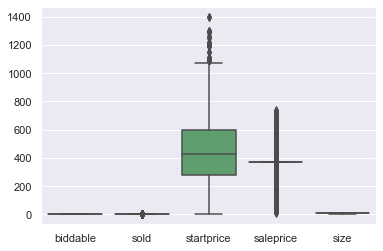

In [118]:
sns.boxplot(data=dataset)

In [119]:
dataset.dtypes

biddable        int64
sold            int64
startprice    float64
saleprice     float64
condition      object
size          float64
heel           object
style          object
color          object
material       object
dtype: object

##Handling the Ordinal Variables, categorical encoding

In [120]:
dataset['heel'].unique()

array(['Low', 'High', 'Flat', 'Medium'], dtype=object)

In [121]:
import category_encoders as ce
df1=pd.DataFrame(dataset['heel'])

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['heel'],return_df=True,
                           mapping=[{'col':'heel',
'mapping':{'Flat':3,'Low':2,'Medium':1,'High':0}}])

#Original data
df1
dataset['heel_transform'] = encoder.fit_transform(df1)
dataset.head(10)

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,heel_transform
0,1,0,199.00,372.735883,Pre-owned,9.5,Low,Open Toe,Black,Suede,2
1,0,0,375.00,372.735883,New with box,7.5,High,Slingback,Other/Missing,Satin,0
2,1,1,299.99,NaN,Pre-owned,8.5,High,Pump,Black,Other/Missing,0
3,1,1,49.99,561.000000,Pre-owned,8.5,High,Pump,Black,Snakeskin,0
4,0,0,89.00,372.735883,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,3
5,1,1,50.00,202.500000,New with box,8.5,High,Platform,Black,Patent Leather,0
6,1,1,250.00,300.010000,Pre-owned,10.0,High,Other/Missing,Black,Other/Missing,0
7,1,0,597.00,372.735883,Pre-owned,6.5,High,Pump,Other/Missing,Other/Missing,0
8,0,1,450.00,450.000000,Pre-owned,9.0,High,Pump,Black,Patent Leather,0
9,1,1,9.99,153.500000,Pre-owned,6.5,High,Slingback,Black,Other/Missing,0


In [122]:
# ordinal encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['style']= label_encoder.fit_transform(dataset['style']) 
dataset['color']= label_encoder.fit_transform(dataset['color']) 
dataset['material']= label_encoder.fit_transform(dataset['material']) 
dataset['condition']= label_encoder.fit_transform(dataset['condition']) 

In [123]:
dataset.head(10)

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,heel_transform
0,1,0,199.00,372.735883,3,9.5,Low,0,1,5,2
1,0,0,375.00,372.735883,0,7.5,High,4,3,3,0
2,1,1,299.99,NaN,3,8.5,High,3,1,1,0
3,1,1,49.99,561.000000,3,8.5,High,3,1,4,0
4,0,0,89.00,372.735883,3,5.5,Flat,1,3,0,3
5,1,1,50.00,202.500000,0,8.5,High,2,1,2,0
6,1,1,250.00,300.010000,3,10.0,High,1,1,1,0
7,1,0,597.00,372.735883,3,6.5,High,3,3,1,0
8,0,1,450.00,450.000000,3,9.0,High,3,1,2,0
9,1,1,9.99,153.500000,3,6.5,High,4,1,1,0


In [124]:
dataset['saleprice'].fillna(dataset['saleprice'].mean(), inplace=True)
dataset['saleprice'].isnull().sum()
dataset['startprice'].fillna(dataset['startprice'].mean(), inplace=True)
dataset['startprice'].isnull().sum()

0

In [125]:
dataset.isnull().sum()

biddable          0
sold              0
startprice        0
saleprice         0
condition         0
size              0
heel              0
style             0
color             0
material          0
heel_transform    0
dtype: int64

In [126]:
data=dataset.copy()
data.sample(10)

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,heel_transform
537,0,0,450.00,372.735883,0,6.0,High,2,3,1,0
458,1,1,149.99,152.500000,3,8.5,High,3,2,0,0
2463,1,0,299.00,372.735883,3,6.0,High,3,3,1,0
388,1,1,99.99,107.500000,3,5.5,High,3,1,0,0
708,1,1,99.00,127.500000,3,8.0,High,2,3,1,0
541,1,0,249.00,372.735883,3,5.5,High,3,1,2,0
1227,1,0,550.00,372.735883,3,9.0,High,2,3,1,0
753,0,0,729.00,372.735883,2,10.0,High,3,1,2,0
2500,1,0,450.00,372.735883,3,8.5,High,3,3,2,0
2587,1,0,460.00,372.735883,3,9.0,High,4,1,5,0


                biddable      sold  startprice  saleprice  condition  \
biddable        1.000000  0.099469   -0.228512  -0.126388   0.124845   
sold            0.099469  1.000000   -0.298622  -0.236860   0.068654   
startprice     -0.228512 -0.298622    1.000000   0.361013  -0.423835   
saleprice      -0.126388 -0.236860    0.361013   1.000000  -0.165214   
condition       0.124845  0.068654   -0.423835  -0.165214   1.000000   
size            0.000980  0.019762    0.032377  -0.004337  -0.024342   
style          -0.006951  0.003216    0.113654   0.064847  -0.063337   
color           0.050496 -0.048832   -0.061769  -0.025376  -0.042564   
material       -0.020448 -0.008642    0.004840  -0.003485  -0.013162   
heel_transform -0.001244 -0.011441   -0.125569  -0.057536   0.035329   

                    size     style     color  material  heel_transform  
biddable        0.000980 -0.006951  0.050496 -0.020448       -0.001244  
sold            0.019762  0.003216 -0.048832 -0.008642       

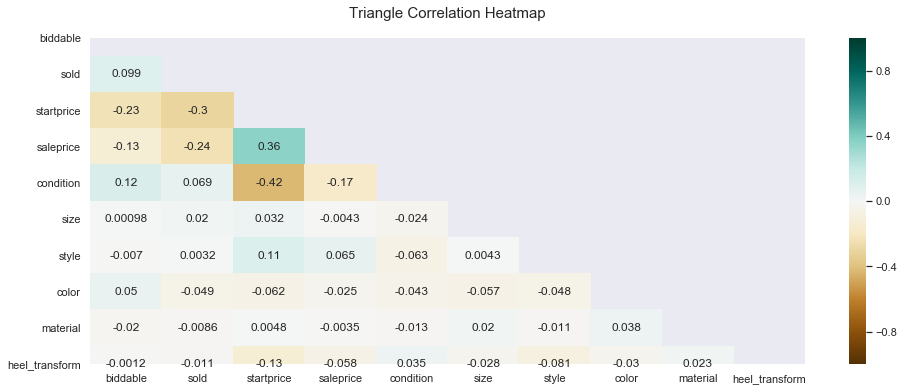

In [127]:
#Correlation Matrix
print(data.corr())

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=20);

In [128]:
# strong negative correlations
corrpairs = data.corr().unstack()
corrpairs[(corrpairs < -0.30)]

startprice  condition    -0.423835
condition   startprice   -0.423835
dtype: float64

C:\Users\Urmisha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Urmisha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Urmisha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


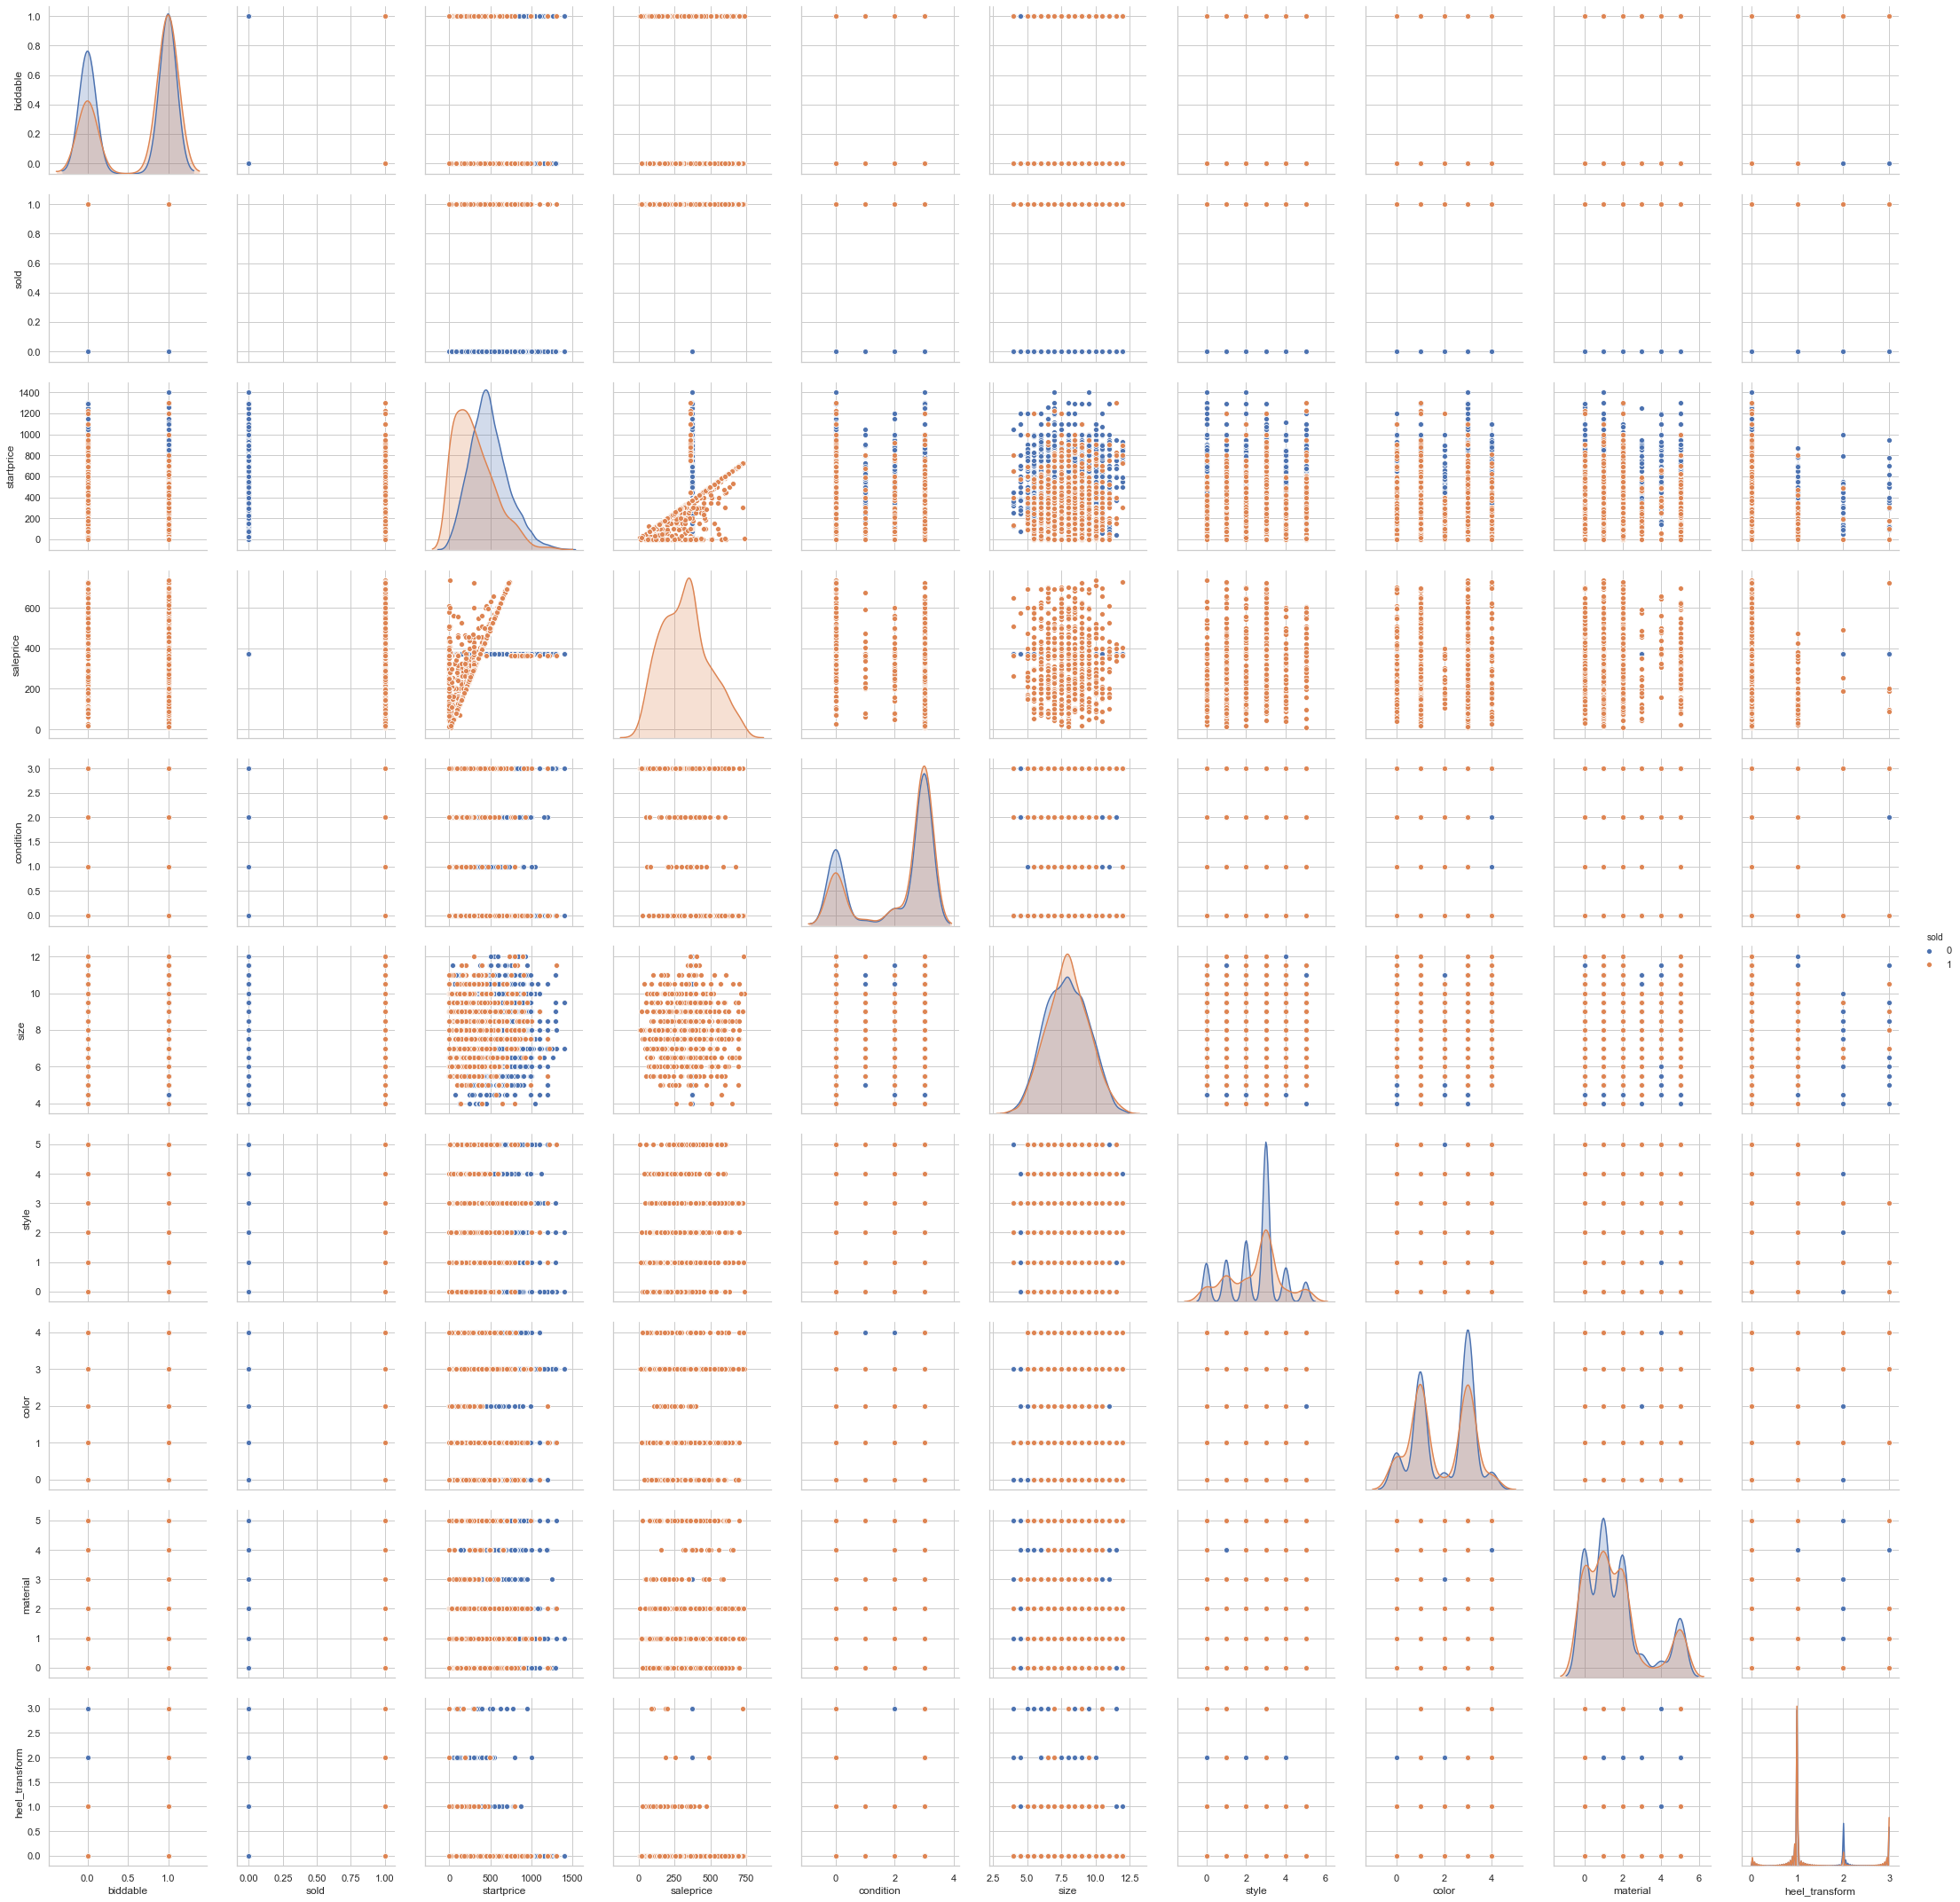

In [129]:
# Pair Plot using seaborn
sns.set_style("whitegrid")
sns.pairplot(data, hue="sold",size=3);
plt.show()

#### Splitting the dataset Train & Test sets

In [130]:
data.head()

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,heel_transform
0,1,0,199.00,372.735883,3,9.5,Low,0,1,5,2
1,0,0,375.00,372.735883,0,7.5,High,4,3,3,0
2,1,1,299.99,363.404588,3,8.5,High,3,1,1,0
3,1,1,49.99,561.000000,3,8.5,High,3,1,4,0
4,0,0,89.00,372.735883,3,5.5,Flat,1,3,0,3


In [138]:
# Split-out validation dataset
X = data.iloc[:,[0,2,3,4,5,7,8,9,10]] # collection of all the independent variables.
y = data.iloc[:,1]# contains the dependent variable (sold)

In [139]:
# splitting into traning and validation sets
SEED=21
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=SEED)

#### Model Building

1. Logistic Regression

In [140]:
# Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions

# comparing actual class and predicted class
print(Y_validation)
print("\n", predictions)

3498    0
991     0
311     1
1416    0
3169    0
       ..
3712    0
2174    0
1974    0
407     0
736     0
Name: sold, Length: 760, dtype: int64

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\Urmisha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [142]:
# Evaluate predictions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
f1_1=f1_score(Y_validation, predictions, average='micro')
acc1=accuracy_score(Y_validation, predictions)
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

Accuracy Score: 
 0.8302631578947368

Confusion Matrix: 
 [[606   2]
 [127  25]]

 Model Metrics: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.90       608
           1       0.93      0.16      0.28       152

    accuracy                           0.83       760
   macro avg       0.88      0.58      0.59       760
weighted avg       0.85      0.83      0.78       760



2. Decision Tree

In [143]:
# Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions


print(Y_validation)
print("\n", predictions)
f1_2=f1_score(Y_validation, predictions, average='micro')
acc2=accuracy_score(Y_validation, predictions)
# Evaluate predictions
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

3498    0
991     0
311     1
1416    0
3169    0
       ..
3712    0
2174    0
1974    0
407     0
736     0
Name: sold, Length: 760, dtype: int64

 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 

3. Random Forest

In [144]:
# Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions
f1_3=f1_score(Y_validation, predictions, average='micro')
acc3=accuracy_score(Y_validation, predictions)
# Evaluate predictions
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

Accuracy Score: 
 0.9960526315789474

Confusion Matrix: 
 [[608   0]
 [  3 149]]

 Model Metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      0.98      0.99       152

    accuracy                           1.00       760
   macro avg       1.00      0.99      0.99       760
weighted avg       1.00      1.00      1.00       760



4. K-NN

In [148]:
# Building kNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions
f1_4=f1_score(Y_validation, predictions, average='micro')
acc4=accuracy_score(Y_validation, predictions)
# Evaluate predictions
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

Accuracy Score: 
 0.9802631578947368

Confusion Matrix: 
 [[608   0]
 [ 15 137]]

 Model Metrics: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       608
           1       1.00      0.90      0.95       152

    accuracy                           0.98       760
   macro avg       0.99      0.95      0.97       760
weighted avg       0.98      0.98      0.98       760



5. Naive Bayes Classification

In [145]:
# Building Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions
f1_5=f1_score(Y_validation, predictions, average='micro')
acc5=accuracy_score(Y_validation, predictions)
# Evaluate predictions
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

Accuracy Score: 
 1.0

Confusion Matrix: 
 [[608   0]
 [  0 152]]

 Model Metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       152

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



6. Support Vector Classifier

In [146]:
# Building Support Vector Classification Model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_validation)
predictions

from sklearn.metrics import f1_score
f1_6=f1_score(Y_validation, predictions, average='micro')

acc6=accuracy_score(Y_validation, predictions)
# Evaluate predictions
print("Accuracy Score: \n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n", confusion_matrix(Y_validation, predictions))
print("\n Model Metrics: \n", classification_report(Y_validation, predictions))

Accuracy Score: 
 0.9039473684210526

Confusion Matrix: 
 [[608   0]
 [ 73  79]]

 Model Metrics: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       608
           1       1.00      0.52      0.68       152

    accuracy                           0.90       760
   macro avg       0.95      0.76      0.81       760
weighted avg       0.91      0.90      0.89       760



In [149]:
accuracy=[acc1,acc2,acc3,acc4,acc5,acc6]
f1_score=[f1_1,f1_2,f1_3,f1_4,f1_5,f1_6]

col={'Accuracy':accuracy,'F1-Score':f1_score}
models=['Logistic Regression','Decision Tree','Random Forest','KNN','Naive Bayes','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Accuracy,F1-Score
Logistic Regression,0.830263,0.830263
Decision Tree,1.000000,1.000000
Random Forest,0.996053,0.996053
KNN,0.980263,0.980263
Naive Bayes,1.000000,1.000000
SVM,0.903947,0.903947


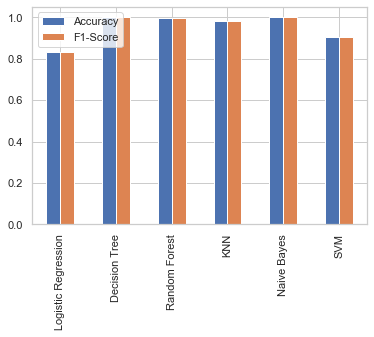

In [150]:
df.plot(kind='bar')

Text(0.5, 1.0, 'Top Features derived by Random Forest')

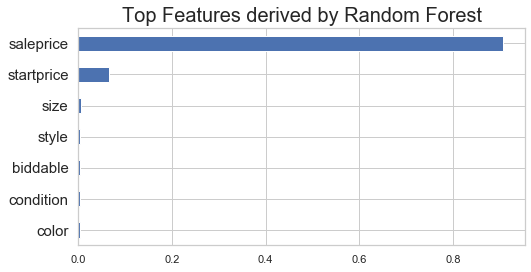

In [152]:
#Top Features influencing the classification model performance
A=data.iloc[:,[0,2,3,4,5,7,8,9,10]]
b=data.iloc[:,1]

## To look for top features using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Train model,  NO scaling is required
rfc_model = rfc.fit(A,b)
# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=A.columns)
    .nlargest(7)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [153]:
# for linear data and model, p-value < 0.05 indicates a significant feature
import statsmodels.api as sm
X = sm.add_constant(A)  # need to add this to define the Intercept
# model / fit / summarize results
model = sm.OLS(b, A)
result = model.fit()
result.summary()

C:\Users\Urmisha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   sold   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.270
Method:                 Least Squares   F-statistic:                              156.6
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                   1.68e-252
Time:                        22:56:33   Log-Likelihood:                         -1828.0
No. Observations:                3796   AIC:                                      3674.
Df Residuals:                    3787   BIC:                                      3730.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
biddable           0.0604      0.013      4.620      0.000       0.035       0.086
startprice        -0.0004   3.07e-05    -13.248      0.000      -0.000      -0.000
saleprice         -0.0001   7.52e-05     -1.672      0.095      -0.000    2.17e-05
condition       3.938e-05      0.005      0.008      0.994      -0.010       0.010
size               0.0424      0.003     13.137      0.000       0.036       0.049
style              0.0248      0.005      5.099      0.000       0.015       0.034
color             -0.0050      0.005     -0.969      0.333      -0.015       0.005
material           0.0052      0.004      1.273      0.203      -0.003       0.013
heel_transform    -0.0309      0.018     -1.762      0.078      -0.065       0.003
==============================================================================
Omnibus:                      634.592   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.379
Skew:                           1.262   Prob(JB):                    2.41e-220
Kurtosis:                       3.149   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
##Checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = A.iloc[:,:]
calc_vif(X)

,variables,VIF
0,biddable,2.495262
1,startprice,6.146193
2,saleprice,19.230784
3,condition,3.586250
4,size,16.774245
5,style,4.546055
6,color,3.530815
7,material,2.079758
8,heel_transform,1.063561


**Note: There is a presence of multicollinearity. 

In [152]:
A.corr()

,biddable,startprice,saleprice,condition,size,style,color,material,heel_transform
biddable,1.000000,-0.228512,-0.126388,0.124845,0.000980,-0.006951,0.050496,-0.020448,-0.001244
startprice,-0.228512,1.000000,0.361013,-0.423835,0.032377,0.113654,-0.061769,0.004840,-0.125569
saleprice,-0.126388,0.361013,1.000000,-0.165214,-0.004337,0.064847,-0.025376,-0.003485,-0.057536
condition,0.124845,-0.423835,-0.165214,1.000000,-0.024342,-0.063337,-0.042564,-0.013162,0.035329
size,0.000980,0.032377,-0.004337,-0.024342,1.000000,0.004347,-0.056522,0.019574,-0.028419
style,-0.006951,0.113654,0.064847,-0.063337,0.004347,1.000000,-0.047524,-0.011081,-0.081464
color,0.050496,-0.061769,-0.025376,-0.042564,-0.056522,-0.047524,1.000000,0.037744,-0.029895
material,-0.020448,0.004840,-0.003485,-0.013162,0.019574,-0.011081,0.037744,1.000000,0.023023
heel_transform,-0.001244,-0.125569,-0.057536,0.035329,-0.028419,-0.081464,-0.029895,0.023023,1.000000


In [155]:
#Fixing multicollinearity. Removed size & saleprice.
X = A.iloc[:,[0,1,3,5,6,7,8]]
calc_vif(X)

,variables,VIF
0,biddable,2.321234
1,startprice,3.337969
2,condition,2.712209
3,style,3.996423
4,color,3.123780
5,material,2.002733
6,heel_transform,1.049463


Text(0.5, 1.0, 'Top Features derived by Random Forest')

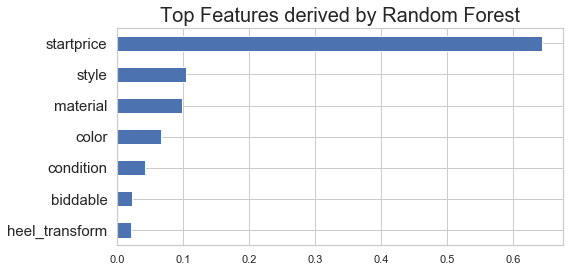

In [156]:
#Top Features influencing the classification model performance
A=X
b=data.iloc[:,1]

## To look for top features using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Train model,  NO scaling is required
rfc_model = rfc.fit(A,b)
# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=A.columns)
    .nlargest(7)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

### Conclusion
1. After comparing the classification models, Decision Tree & Naive Bayes came out the best performing model based on Accuracy and F1-score.
2. The features that influence the purchasing behavior of customers on Ebay are on Startprice,style, material, color, condition, biddable, heel